<a href="https://colab.research.google.com/github/KislayJha5/Customer-Churn-Prediction/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Definition:
# Predict if a customer will churn (leave) based on their data.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Data Collection & Cleaning:


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data = data.drop('customerID', axis=1)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()

# Encode categorical variables

In [7]:
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category').cat.codes

# 3. Data Analysis & Charts:


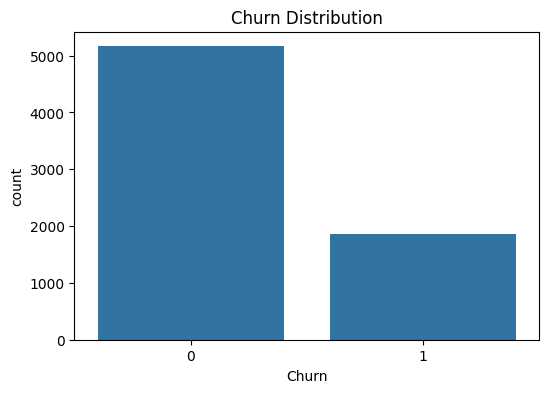

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

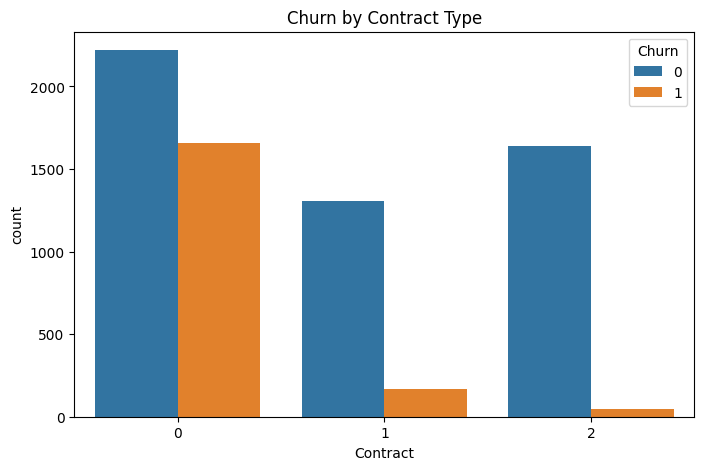

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.show()

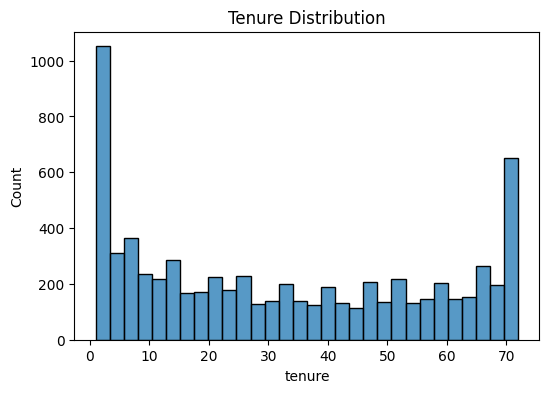

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data['tenure'], bins=30)
plt.title('Tenure Distribution')
plt.show()

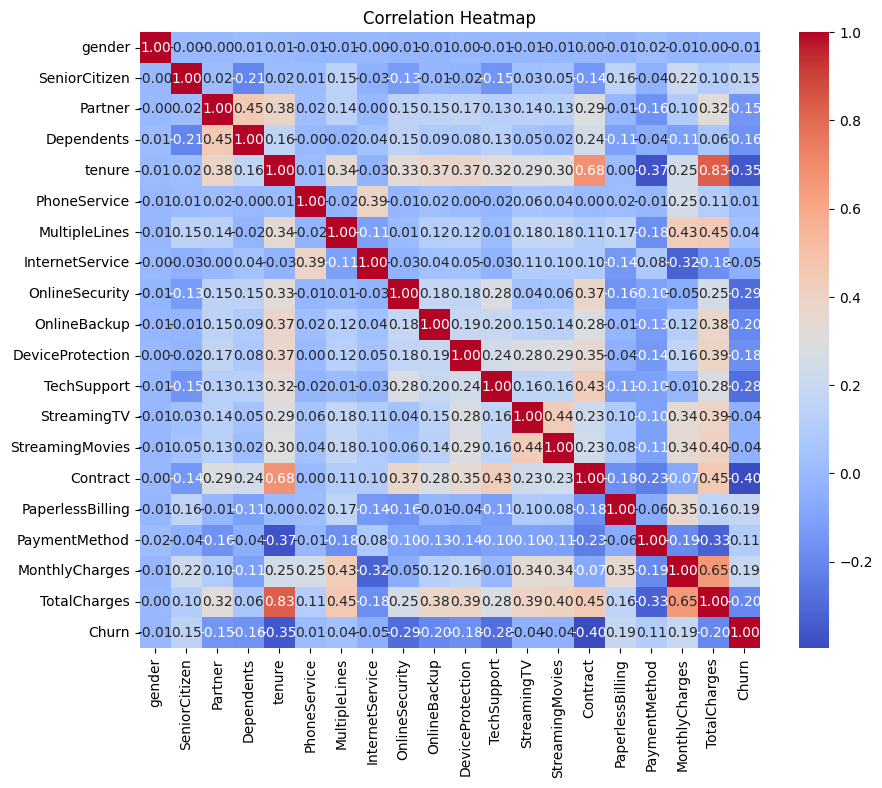

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# 4. Model Building:


In [12]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5. Model Checking:


In [15]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7848341232227488

Confusion Matrix:
 [[1384  165]
 [ 289  272]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.48      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110



# 6. Results & Insights:
# Feature importance to identify key churn drivers


In [16]:
importances = rf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

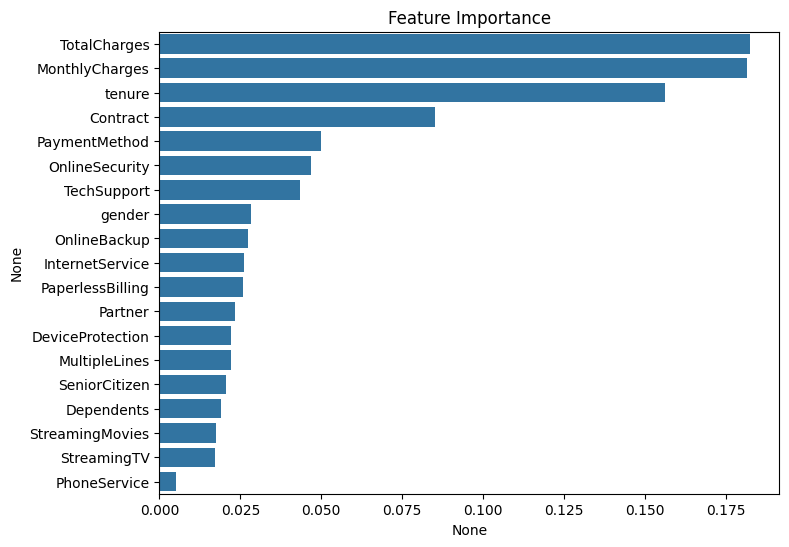

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance')
plt.show()

# 7. Report & Documentation:
# Clearly document each step with comments and save visualizations if needed.

# Optional: Hyperparameter tuning for better model


In [18]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [19]:
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)

Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [20]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))

Tuned Model Accuracy: 0.7900473933649289
